## 0) 라이브러리 & 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# 데이터 로드
df_cars = pd.read_csv("C:/Users/ansun/Desktop/데이터분석/과제/260209_과제/cars.csv")
df_brand = pd.read_csv("C:/Users/ansun/Desktop/데이터분석/과제/260209_과제/brand.csv")

# 한글 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False


## 1) EDA : 데이터 구조 / 결측치 / 기술통계 / 범주형 / 이상치

📌 cars 데이터 행/열 크기 : (3687, 13)
📌 brand 데이터 행/열 크기 : (48, 2)

📌 cars 데이터 상위 5개


,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN



📌 brand 데이터 상위 5개


,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States



📌 cars 데이터 구조

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB

📌 데이터 결측치 확인


,Missing Count,Missing Percent
Service history,3147,85.353946
Previous Owners,1411,38.269596
Emission Class,87,2.359642
Engine,45,1.220504
Seats,35,0.949281
Doors,25,0.678058
title,0,0.000000
Price,0,0.000000
Mileage(miles),0,0.000000
Registration_Year,0,0.000000


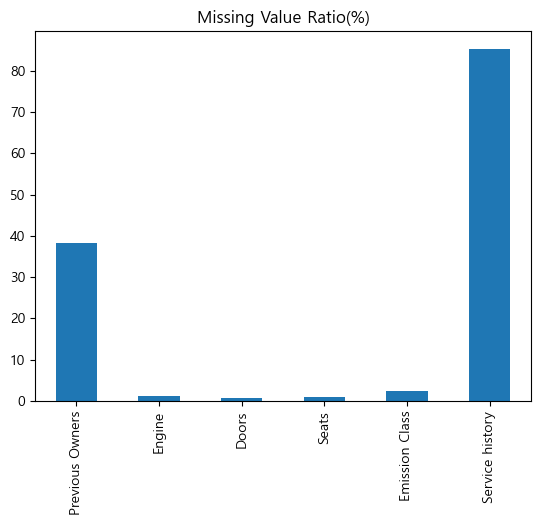


📌 기술 통계 확인


,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000



📌 범주형 데이터 요약


,title,Fuel type,Body type,Engine,Gearbox,Emission Class,Service history
count,3687,3687,3687,3642,3687,3600,540
unique,455,6,10,34,2,6,1
top,VAUXHALL CORSA,Petrol,Hatchback,1.6L,Manual,Euro 5,Full
freq,223,2362,2280,736,2870,1257,540



📌 title 예시 확인


0       SKODA FABIA
1    VAUXHALL CORSA
2       HYUNDAI I30
3        MINI HATCH
4    VAUXHALL CORSA
5     HYUNDAI COUPE
6        FORD FOCUS
7    VAUXHALL CORSA
8         VOLVO 740
9       PEUGEOT 207
Name: title, dtype: object


📌 title 상위 빈도 확인


title
VAUXHALL CORSA           223
FORD FOCUS               162
VAUXHALL ASTRA           155
FORD FIESTA              128
BMW 3 SERIES             119
RENAULT CLIO             105
VOLKSWAGEN POLO          101
TOYOTA YARIS              81
MINI HATCH                78
MERCEDES-BENZ C CLASS     58
Name: count, dtype: int64


📌 컬럼명 확인
Index(['title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Doors', 'Seats', 'Emission Class', 'Service history'],
      dtype='object')


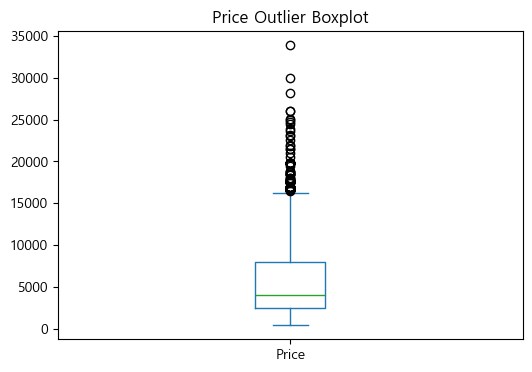


📌 Price 상위값 확인 (Top 10)


3212    33900
2936    30000
3224    28240
3230    25995
3102    25995
2913    25100
3130    25000
2183    24770
2862    24444
3213    23910
Name: Price, dtype: int64


📌 이상치 기준 상한값: 16252.5
📌 이상치 개수: 124


,title,Price
3212,MERCEDES-BENZ GLE CLASS,33900
2936,LAND ROVER RANGE ROVER SPORT,30000
3224,BMW X3 SERIES,28240
3230,LAND ROVER RANGE ROVER SPORT,25995
3102,SEAT ATECA,25995
2913,LAND ROVER RANGE ROVER EVOQUE,25100
3130,AUDI A6,25000
2183,DS AUTOMOBILES DS 9,24770
2862,LAND ROVER RANGE ROVER EVOQUE,24444
3213,MAZDA MAZDA6 TOURER,23910


In [2]:
# 데이터 구조 확인
print("📌 cars 데이터 행/열 크기 :", df_cars.shape)
print("📌 brand 데이터 행/열 크기 :", df_brand.shape)

print("\n📌 cars 데이터 상위 5개")
display(df_cars.head())

print("\n📌 brand 데이터 상위 5개")
display(df_brand.head())

print("\n📌 cars 데이터 구조\n")
df_cars.info()

# 결측치 요약
print("\n📌 데이터 결측치 확인")
missing_summary = pd.DataFrame({
    "Missing Count": df_cars.isnull().sum(),
    "Missing Percent": df_cars.isnull().mean() * 100
}).sort_values("Missing Percent", ascending=False)
display(missing_summary)

# 결측치 있는 컬럼만 시각화
((df_cars.isnull().mean() * 100)[lambda x: x > 0]).plot(kind="bar")
plt.title("Missing Value Ratio(%)")
plt.show()

# 기술통계
print("\n📌 기술 통계 확인")
display(df_cars.describe())

# 범주형 요약 + title 형태 확인
print("\n📌 범주형 데이터 요약")
display(df_cars.describe(include="object"))

print("\n📌 title 예시 확인")
display(df_cars["title"].head(10))

print("\n📌 title 상위 빈도 확인")
display(df_cars["title"].value_counts().head(10))

# 컬럼명 확인
print("\n📌 컬럼명 확인")
print(df_cars.columns)

# Price 이상치 확인 (boxplot + 상위값)
plt.figure(figsize=(6,4))
df_cars["Price"].plot(kind="box")
plt.title("Price Outlier Boxplot")
plt.show()

print("\n📌 Price 상위값 확인 (Top 10)")
display(df_cars["Price"].sort_values(ascending=False).head(10))

# IQR 기반 이상치 기준
Q1 = df_cars["Price"].quantile(0.25)
Q3 = df_cars["Price"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print("\n📌 이상치 기준 상한값:", upper_bound)

outliers = df_cars[df_cars["Price"] > upper_bound]
print("📌 이상치 개수:", len(outliers))
display(outliers[["title", "Price"]].sort_values("Price", ascending=False).head(10))


## 2) cars.csv + brand.csv 합치기(title에서 브랜드 추출)

In [3]:
# [목표] cars의 title에서 브랜드 추출 후 brand 데이터(country)와 결합

# cars에서 브랜드 추출 (첫 단어) + 소문자 통일
df_cars["brand_name"] = (
    df_cars["title"].astype(str).str.strip().str.split().str[0].str.lower()
)

# brand 컬럼명 정리 (title -> brand_name) + 소문자 통일
df_brand2 = df_brand.rename(columns={"title": "brand_name"})
df_brand2["brand_name"] = df_brand2["brand_name"].astype(str).str.strip().str.lower()

print("\n📌 cars 브랜드 추출 예시")
display(df_cars[["title", "brand_name"]].head(10))

# merge 수행
df_merged = df_cars.merge(df_brand2, on="brand_name", how="left")

print("\n📌 Merge 결과:", df_merged.shape)
display(df_merged.head())

# 매칭 실패 확인
unmatched = df_merged[df_merged["country"].isna()]["brand_name"].value_counts()
print("\n📌 매칭 실패 브랜드 Top 30 (없으면 정상)")
display(unmatched.head(30))



📌 cars 브랜드 추출 예시


,title,brand_name
0,SKODA FABIA,skoda
1,VAUXHALL CORSA,vauxhall
2,HYUNDAI I30,hyundai
3,MINI HATCH,mini
4,VAUXHALL CORSA,vauxhall
5,HYUNDAI COUPE,hyundai
6,FORD FOCUS,ford
7,VAUXHALL CORSA,vauxhall
8,VOLVO 740,volvo
9,PEUGEOT 207,peugeot



📌 Merge 결과: (3687, 15)


,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand_name,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,United Kingdom



📌 매칭 실패 브랜드 Top 30 (없으면 정상)


Series([], Name: count, dtype: int64)

## 3) 카테고리형 변수 → 숫자형 변환(Engine / Emission Class)

In [4]:
# [목표] Engine, Emission Class를 숫자형 파생변수로 변환

print("\n📌 Engine / Emission Class 예시")
display(df_merged[["Engine", "Emission Class"]].head(10))

print("\n📌 Engine 고유값 예시")
print(df_merged["Engine"].value_counts().head(10))

print("\n📌 Emission Class 고유값 예시")
print(df_merged["Emission Class"].value_counts().head(10))

# 안전한 숫자 변환
df_merged["Engine_num"] = pd.to_numeric(
    df_merged["Engine"].astype(str).str.replace("L", "").str.strip(),
    errors="coerce"
)

df_merged["Emission_num"] = pd.to_numeric(
    df_merged["Emission Class"].astype(str).str.extract(r"(\d+)")[0],
    errors="coerce"
)

print("\n📌 변환 후 결측 확인")
print(df_merged[["Engine_num", "Emission_num"]].isnull().sum())

# 중앙값 대체
df_merged["Engine_num"] = df_merged["Engine_num"].fillna(df_merged["Engine_num"].median())
df_merged["Emission_num"] = df_merged["Emission_num"].fillna(df_merged["Emission_num"].median())

print("\n📌 변환 결과 확인")
display(df_merged[["Engine", "Engine_num", "Emission Class", "Emission_num"]].head(10))



📌 Engine / Emission Class 예시


,Engine,Emission Class
0,1.4L,Euro 6
1,1.2L,Euro 4
2,1.4L,Euro 5
3,1.4L,Euro 4
4,1.3L,Euro 5
5,2.0L,Euro 4
6,1.6L,Euro 4
7,1.2L,Euro 4
8,2.3L,NaN
9,1.6L,Euro 4



📌 Engine 고유값 예시
Engine
1.6L    736
2.0L    553
1.2L    521
1.4L    421
1.0L    326
1.5L    294
1.3L    170
1.8L    158
3.0L     79
2.2L     75
Name: count, dtype: int64

📌 Emission Class 고유값 예시
Emission Class
Euro 5    1257
Euro 6    1109
Euro 4    1068
Euro 3     137
Euro 2      25
Euro 1       4
Name: count, dtype: int64

📌 변환 후 결측 확인
Engine_num      45
Emission_num    87
dtype: int64

📌 변환 결과 확인


,Engine,Engine_num,Emission Class,Emission_num
0,1.4L,1.4,Euro 6,6.0
1,1.2L,1.2,Euro 4,4.0
2,1.4L,1.4,Euro 5,5.0
3,1.4L,1.4,Euro 4,4.0
4,1.3L,1.3,Euro 5,5.0
5,2.0L,2.0,Euro 4,4.0
6,1.6L,1.6,Euro 4,4.0
7,1.2L,1.2,Euro 4,4.0
8,2.3L,2.3,NaN,5.0
9,1.6L,1.6,Euro 4,4.0


## 4) 결측치 처리(Service history: Unknown + 결측치 많은 행 제거)

In [5]:
# [목표]
# 1) Service history 결측치는 'Unknown'으로 채움
# 2) 결측치가 3개 이상인 행은 제거

print("\n📌 Service history 결측치 개수:", df_merged["Service history"].isnull().sum())

df_merged["Service history"] = df_merged["Service history"].fillna("Unknown")

print("\n📌 Service history 분포")
print(df_merged["Service history"].value_counts().head(5))

# 행별 결측치 개수 계산
df_merged["missing_count"] = df_merged.isnull().sum(axis=1)
display(df_merged["missing_count"].describe())

# 결측치가 3개 이상인 행 제거
threshold = 3
df_clean = df_merged[df_merged["missing_count"] < threshold].copy()

print("\n📌 제거 전 데이터 크기:", df_merged.shape)
print("📌 제거 후 데이터 크기:", df_clean.shape)

# 임시 컬럼 제거
df_clean.drop(columns=["missing_count"], inplace=True)

print("\n📌 최종 데이터 크기:", df_clean.shape)
print("📌 남은 결측치 개수:\n", df_clean.isnull().sum().sort_values(ascending=False))



📌 Service history 결측치 개수: 3147

📌 Service history 분포
Service history
Unknown    3147
Full        540
Name: count, dtype: int64


count    3687.000000
mean        0.434771
std         0.615424
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: missing_count, dtype: float64


📌 제거 전 데이터 크기: (3687, 18)
📌 제거 후 데이터 크기: (3626, 18)

📌 최종 데이터 크기: (3626, 17)
📌 남은 결측치 개수:
 Previous Owners      1361
Emission Class         26
Seats                  11
Doors                   7
Engine                  1
title                   0
Engine_num              0
country                 0
brand_name              0
Service history         0
Gearbox                 0
Price                   0
Body type               0
Fuel type               0
Registration_Year       0
Mileage(miles)          0
Emission_num            0
dtype: int64


## 5) PCA/Scaler용 숫자 변수 결측치 정리 + Service_binary 생성

PCA는 NaN을 허용하지 않으므로, 스케일링 전에 num_cols의 결측치를 반드시 0으로 만들어야 함.

In [6]:
# Scaler/PCA에 사용할 숫자형 변수 목록
num_cols = ["Mileage(miles)", "Registration_Year",
            "Engine_num", "Emission_num",
            "Previous Owners", "Doors", "Seats"]

print("\n📌 스케일링 전 결측치 확인")
print(df_clean[num_cols].isnull().sum().sort_values(ascending=False))

# 숫자형 결측치 처리
df_clean["Previous Owners"] = df_clean["Previous Owners"].fillna(df_clean["Previous Owners"].median())
df_clean["Doors"] = df_clean["Doors"].fillna(df_clean["Doors"].mode()[0])
df_clean["Seats"] = df_clean["Seats"].fillna(df_clean["Seats"].mode()[0])

print("\n📌 결측치 처리 후 확인 (PCA NaN 방지)")
print(df_clean[num_cols].isnull().sum().sort_values(ascending=False))

# Service history 이진 변수
df_clean["Service_binary"] = (df_clean["Service history"] == "Full").astype(int)



📌 스케일링 전 결측치 확인
Previous Owners      1361
Seats                  11
Doors                   7
Mileage(miles)          0
Registration_Year       0
Engine_num              0
Emission_num            0
dtype: int64

📌 결측치 처리 후 확인 (PCA NaN 방지)
Mileage(miles)       0
Registration_Year    0
Engine_num           0
Emission_num         0
Previous Owners      0
Doors                0
Seats                0
dtype: int64


## 6) Scaler 적용 (Standard / MinMax 비교)

In [7]:
# StandardScaler (평균=0, 표준편차=1)
std_scaler = StandardScaler()
df_scaled_std = df_clean.copy()
df_scaled_std[num_cols] = std_scaler.fit_transform(df_clean[num_cols])

print("\n📌 StandardScaler 적용 후")
display(df_scaled_std[num_cols].head(10))

# MinMaxScaler (0~1)
mm_scaler = MinMaxScaler()
df_scaled_mm = df_clean.copy()
df_scaled_mm[num_cols] = mm_scaler.fit_transform(df_clean[num_cols])

print("\n📌 MinMaxScaler 적용 후")
display(df_scaled_mm[num_cols].head(10))

print("\n📌 스케일링 전")
display(df_clean[num_cols].describe())

print("\n📌 StandardScaler 후")
display(df_scaled_std[num_cols].describe())

print("\n📌 MinMaxScaler 후")
display(df_scaled_mm[num_cols].describe())



📌 StandardScaler 적용 후


,Mileage(miles),Registration_Year,Engine_num,Emission_num,Previous Owners,Doors,Seats
0,-0.286987,0.836087,-0.421306,1.200625,0.097356,0.690502,0.172968
1,0.178919,-0.784467,-0.833351,-1.003662,0.912633,-1.331105,0.172968
2,1.405102,-0.176759,-0.421306,0.098482,0.097356,0.690502,0.172968
3,0.385229,-0.379328,-0.421306,-1.003662,1.727909,-1.331105,-1.554805
4,0.088124,0.228379,-0.627329,0.098482,0.097356,0.690502,0.172968
5,1.080821,-0.987036,0.814829,-1.003662,0.097356,-1.331105,-1.554805
6,1.496252,-0.784467,-0.009261,-1.003662,0.097356,0.690502,0.172968
7,0.214756,-0.581898,-0.833351,-1.003662,0.097356,-1.331105,0.172968
9,0.138777,-0.784467,-0.009261,-1.003662,1.727909,0.690502,0.172968
10,2.537019,-0.581898,-0.009261,-1.003662,0.097356,-1.331105,0.172968



📌 MinMaxScaler 적용 후


,Mileage(miles),Registration_Year,Engine_num,Emission_num,Previous Owners,Doors,Seats
0,0.063227,0.862745,0.109091,1.0,0.250,1.000000,0.6
1,0.079798,0.705882,0.072727,0.6,0.375,0.333333,0.6
2,0.123412,0.764706,0.109091,0.8,0.250,1.000000,0.6
3,0.087136,0.745098,0.109091,0.6,0.500,0.333333,0.4
4,0.076569,0.803922,0.090909,0.8,0.250,1.000000,0.6
5,0.111877,0.686275,0.218182,0.6,0.250,0.333333,0.4
6,0.126654,0.705882,0.145455,0.6,0.250,1.000000,0.6
7,0.081073,0.725490,0.072727,0.6,0.250,0.333333,0.6
9,0.078370,0.705882,0.145455,0.6,0.500,1.000000,0.6
10,0.163672,0.725490,0.145455,0.6,0.250,0.333333,0.6



📌 스케일링 전


,Mileage(miles),Registration_Year,Engine_num,Emission_num,Previous Owners,Doors,Seats
count,3.626000e+03,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000,3626.00000
mean,8.152049e+04,2011.872587,1.604495,4.910645,2.880585,4.316878,4.89989
std,3.948978e+04,4.937265,0.485451,0.907448,1.226747,0.989449,0.57886
min,1.000000e+00,1972.000000,0.800000,1.000000,1.000000,2.000000,2.00000
25%,5.698400e+04,2008.000000,1.300000,4.000000,2.000000,3.000000,5.00000
50%,8.000000e+04,2012.000000,1.600000,5.000000,3.000000,5.000000,5.00000
75%,1.031748e+05,2016.000000,1.900000,6.000000,3.000000,5.000000,5.00000
max,1.110100e+06,2023.000000,6.300000,6.000000,9.000000,5.000000,7.00000



📌 StandardScaler 후


,Mileage(miles),Registration_Year,Engine_num,Emission_num,Previous Owners,Doors,Seats
count,3.626000e+03,3.626000e+03,3.626000e+03,3.626000e+03,3.626000e+03,3.626000e+03,3.626000e+03
mean,-1.254129e-16,-7.117185e-15,3.958346e-16,-4.389453e-16,1.724428e-16,4.311070e-16,-7.745229e-16
std,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00
min,-2.064603e+00,-8.076958e+00,-1.657441e+00,-4.310093e+00,-1.533196e+00,-2.341908e+00,-5.010349e+00
25%,-6.214234e-01,-7.844668e-01,-6.273288e-01,-1.003662e+00,-7.179199e-01,-1.331105e+00,1.729678e-01
50%,-3.850859e-02,2.580998e-02,-9.261353e-03,9.848166e-02,9.735650e-02,6.905018e-01,1.729678e-01
75%,5.484268e-01,8.360868e-01,6.088061e-01,1.200625e+00,9.735650e-02,6.905018e-01,1.729678e-01
max,2.605032e+01,2.254071e+00,9.673795e+00,1.200625e+00,4.989015e+00,6.905018e-01,3.628513e+00



📌 MinMaxScaler 후


,Mileage(miles),Registration_Year,Engine_num,Emission_num,Previous Owners,Doors,Seats
count,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000
mean,0.073434,0.781815,0.146272,0.782129,0.235073,0.772293,0.579978
std,0.035573,0.096809,0.088264,0.181490,0.153343,0.329816,0.115772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.051331,0.705882,0.090909,0.600000,0.125000,0.333333,0.600000
50%,0.072065,0.784314,0.145455,0.800000,0.250000,1.000000,0.600000
75%,0.092941,0.862745,0.200000,1.000000,0.250000,1.000000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 7) PCA: 누적 설명분산 70% 이상 최소 주성분 추출

In [8]:
# PCA는 일반적으로 StandardScaler 기반 데이터로 수행
pca = PCA()
x_pca = pca.fit_transform(df_scaled_std[num_cols])

cumulative_var = np.cumsum(pca.explained_variance_ratio_)
print("\n📌 누적 설명력 :", cumulative_var)

n_components_70 = np.argmax(cumulative_var >= 0.70) + 1
print("📌 70% 이상을 위한 최소 주성분 개수 :", n_components_70)

pca70 = PCA(n_components=n_components_70)
X_reduced = pca70.fit_transform(df_scaled_std[num_cols])

print("📌 PCA 적용 후 shape :", X_reduced.shape)

df_pca = pd.DataFrame(
    X_reduced,
    columns=[f"PC{i+1}" for i in range(n_components_70)]
)

display(df_pca.head())



📌 누적 설명력 : [0.37926374 0.59349937 0.72137359 0.82557672 0.91526751 0.98419138
 1.        ]
📌 70% 이상을 위한 최소 주성분 개수 : 3
📌 PCA 적용 후 shape : (3626, 3)


,PC1,PC2,PC3
0,1.447174,0.395223,-0.121697
1,-1.371048,-0.833848,-1.120780
2,-0.355577,0.810208,-0.114854
3,-1.722605,-1.929255,-0.744303
4,0.437068,0.464988,-0.581831
